# case0402

Information:
Educational researchers randomly assigned 28 ninth-year students in Australia to receive coordinate
geometry training in one of two ways: a conventional way and a modified way. After the training,
the students were asked to solve a coordinate geometry problem. The time to complete the problem
was recorded, but five students in the “conventional” group did not complete the solution in the five
minute alloted time.

Format: A data frame with 28 observations on the following 3 variables.
- Time    - the time (in seconds) that the student worked on the problem
- Treatmt - factor variable with two levels—'Modified' and 'Conventional'
- Censor  - 1 if the individual did not complete the problem in 5 minutes, 0 if they did

In [36]:
library(Sleuth2)
str(case0402)

'data.frame':	28 obs. of  3 variables:
 $ Time   : num  68 70 73 75 77 80 80 132 148 155 ...
 $ Treatmt: Factor w/ 2 levels "Modified","Conventional": 1 1 1 1 1 1 1 1 1 1 ...
 $ Censor : num  0 0 0 0 0 0 0 0 0 0 ...


- [x] (1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Data stručně popište. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

In [37]:
# Jak si vysvětlit skupinu studentů, kteří test nedokončili? Dropnout jejich hodnoty? TODO: zeptat se Vašaty.
include_failed <- F

conv <- subset(case0402, Treatmt=="Conventional" & (Censor==0 | include_failed), Time, drop=TRUE)
mod <- subset(case0402, Treatmt=="Modified" & (Censor==0 | include_failed), Time, drop=TRUE)

*Konvenční přístup k výuce:*

In [38]:
cat("Conventional:\n")
cat("EX =", mean(conv), "\n")
cat("varX =", var(conv), "\n")
cat("median =", median(conv))

Conventional:
EX = 182 
varX = 2493 
median = 161

*Modifikovaný přístup k výuce:*

In [39]:
cat("Modified:\n")
cat("EX =", mean(mod), "\n")
cat("varX =", var(mod), "\n")
cat("median =", median(mod))

Modified:
EX = 125.2857 
varX = 3203.297 
median = 106

- [x] (1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

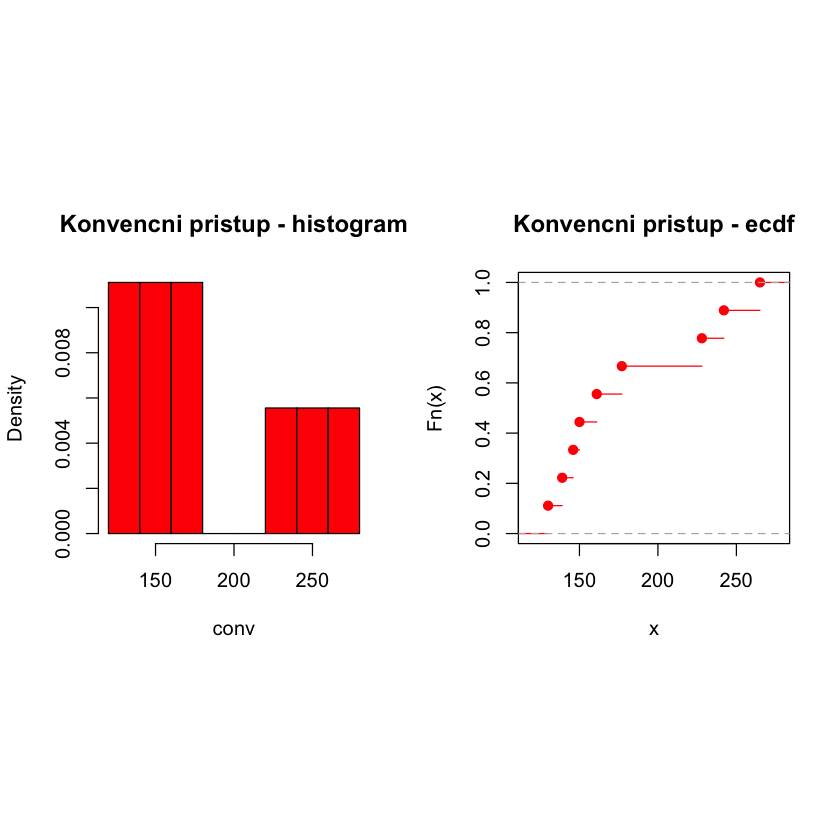

In [40]:
par(mfrow = c(1, 2), pty = "s")
hist(conv, col="red", main="Konvencni pristup - histogram", probability=T)
plot.ecdf(conv, col="red", main="Konvencni pristup - ecdf")

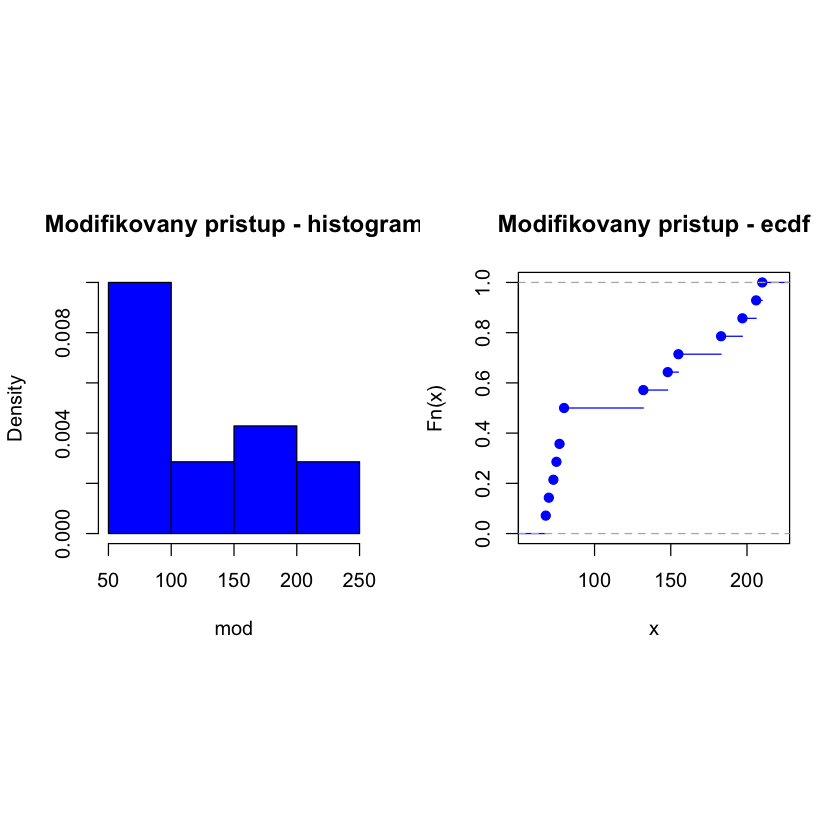

In [41]:
par(mfrow = c(1, 2), pty = "s") 
hist(mod, col="blue", main = "Modifikovany pristup - histogram", probability=T)
plot.ecdf(mod, col="blue", main="Modifikovany pristup - ecdf")

- [ ] (3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

> ??? Odhadnout takhle nebo nějakou inteligentnější minimalizací? 

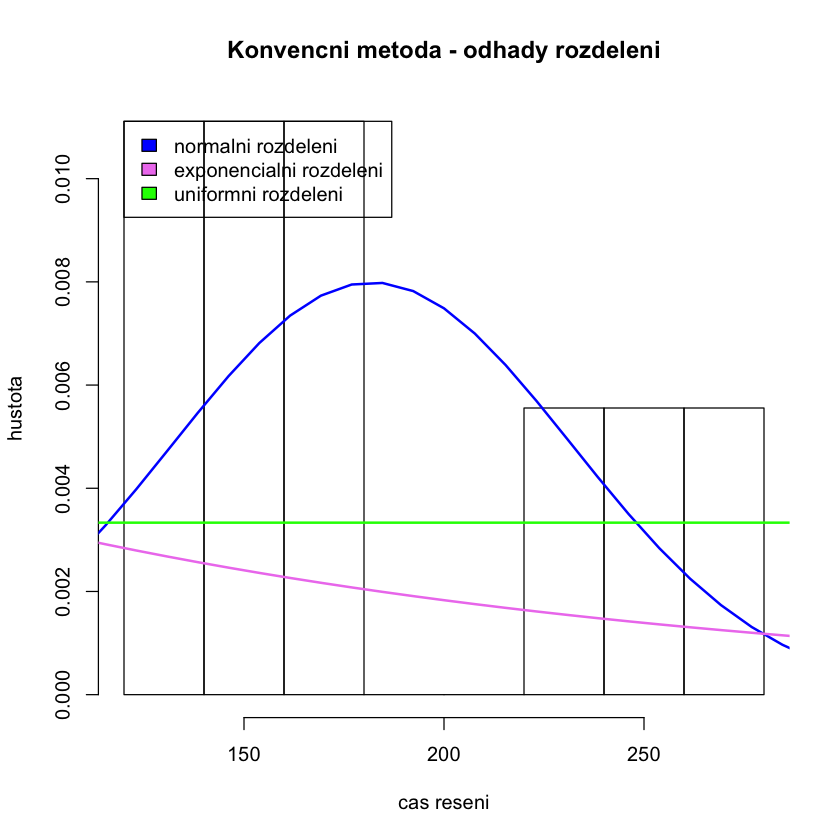

In [42]:
# množina x bodů
x <- seq(0, 300, length=40)

# hodnoty pro jednotlivá rozložení
y_norm <- dnorm(x, mean=mean(conv), sd=sd(conv))
y_exp <- dexp(x, 1/mean(conv))
y_unif <- dunif(x, min = 0, max = 300)

hist(conv, probability=T, main="Konvencni metoda - odhady rozdeleni", xlab="cas reseni", ylab="hustota")
lines(x, y_norm, col="blue", lwd=2)
lines(x, y_exp, col="violet", lwd=2) 
lines(x, y_unif, col="green", lwd=2)

legend("topleft", inset=0.037, fill=c("blue","violet","green"), 
       legend=c("normalni rozdeleni", "exponencialni rozdeleni", "uniformni rozdeleni"))

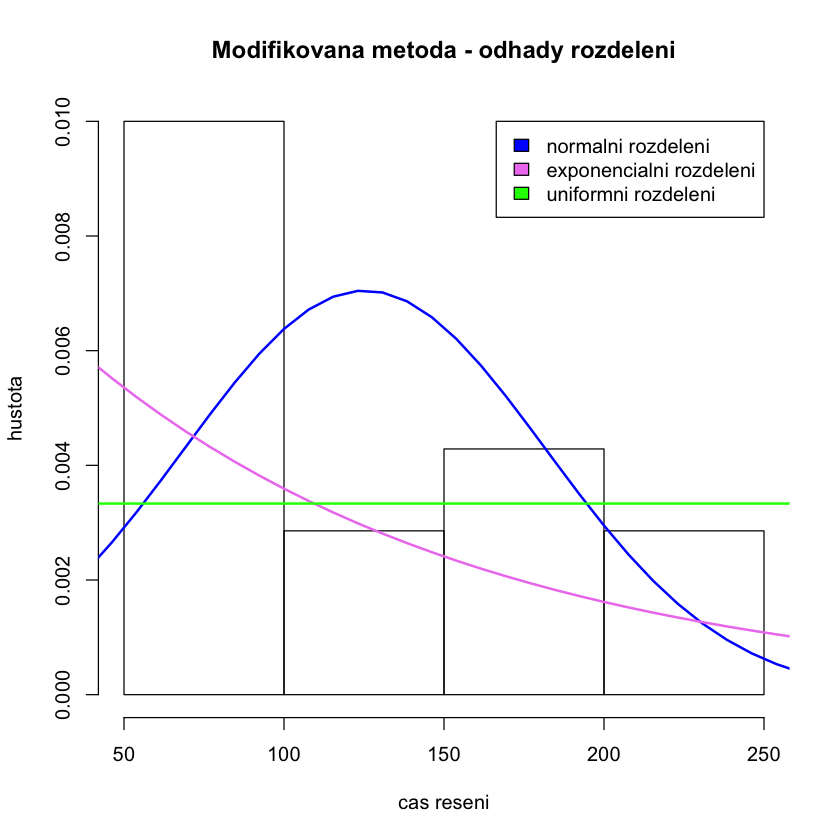

In [43]:
# množina x bodů
x <- seq(0, 300, length=40)

# hodnoty pro jednotlivá rozložení
y_norm <- dnorm(x, mean=mean(mod), sd=sd(mod))
y_exp <- dexp(x, 1/mean(mod))
y_unif <- dunif(x, min = 0, max = 300)

hist(mod, probability=T, main="Modifikovana metoda - odhady rozdeleni", xlab="cas reseni", ylab="hustota")
lines(x, y_norm, col="blue", lwd=2)
lines(x, y_exp, col="violet", lwd=2) 
lines(x, y_unif, col="green", lwd=2)

legend("topright", inset=0.037, fill=c("blue","violet","green"), 
       legend=c("normalni rozdeleni", "exponencialni rozdeleni", "uniformni rozdeleni"))

- [ ] (1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

In [44]:
# TODO

- [ ] (1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [45]:
# TODO

- [ ] (1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5% hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

In [46]:
# TODO

- [ ] (2b) Na hladině spolehlivosti 5% otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

In [47]:
# TODO